# Assignment 8 (10 Points): Pandas

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.rows', 10)

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('data/flights.csv')
airports = pd.read_csv('data/airports.csv')

### Q1 (3 points): Reverse engineer the following dataframe by merging the flights and airports datasets.

In [3]:
merged = pd.merge(flights, airports, left_on = "origin", right_on = "faa", how = 'outer').drop(['lat', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'air_time', 'distance', 'hour', 'minute', 'time_hour', 'faa', 'lon', 'alt', 'tz', 'dst', 'tzone'], axis = 1)
merged = merged.rename(columns = {"name": "origin_name"})
merged_final = pd.merge(merged, airports, left_on = "dest", right_on = "faa", how = 'outer').drop(['faa', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone'], axis = 1)
merged_final = merged_final.rename(columns = {"name": "dest_name"})
merged_final = merged_final[['origin', 'dest', 'tailnum', 'origin_name', 'dest_name']]
merged_final

,origin,dest,tailnum,origin_name,dest_name
0,EWR,IAH,N14228,Newark Liberty Intl,George Bush Intercontinental
1,EWR,IAH,N37408,Newark Liberty Intl,George Bush Intercontinental
2,EWR,IAH,N12216,Newark Liberty Intl,George Bush Intercontinental
3,EWR,IAH,N667UA,Newark Liberty Intl,George Bush Intercontinental
4,EWR,IAH,N39418,Newark Liberty Intl,George Bush Intercontinental
...,...,...,...,...,...
339583,NaN,NaN,NaN,NaN,Black Rock
339584,NaN,NaN,NaN,NaN,New Haven Rail Station
339585,NaN,NaN,NaN,NaN,Wilmington Amtrak Station
339586,NaN,NaN,NaN,NaN,Washington Union Station


### Q2 (4 points): Use the resulting dataframe from Q1 to reverse engineer the following results (i.e., sorting the count of flights between the origin and destination airports).

In [4]:
merged_final.groupby(['origin_name', 'dest_name']).count().drop(['origin', 'dest'], axis = 1).sort_values(by = ['tailnum'], ascending = False)  

tailnum
origin_name         dest_name                               
John F Kennedy Intl Los Angeles Intl                   11237
La Guardia          Hartsfield Jackson Atlanta Intl    10262
                    Chicago Ohare Intl                  8717
John F Kennedy Intl San Francisco Intl                  8174
La Guardia          Charlotte Douglas Intl              6114
...                                                      ...
John F Kennedy Intl Memphis Intl                           1
                    Lambert St Louis Intl                  1
                    Birmingham Intl                        1
La Guardia          Blue Grass                             1
Newark Liberty Intl La Guardia                             0

[217 rows x 1 columns]

### Q3 (3 points): Compute and plot the rolling mean and standard deviation of the price ratio between GOOG and NASDAQ.

- UCB stands for Upper Confidence Bound and is computed using mean + std.
- LCB stands for Lower Confidence Bound and is computed using mean - std.

In [5]:
GOOG = pd.read_csv('data/GOOG.csv', index_col = 0, parse_dates = ['Date'])
NASDAQ = pd.read_csv('data/NASDAQ.csv', index_col = 0, parse_dates = ['Date'])

GOOG = GOOG['Close']
NASDAQ = NASDAQ['Close']

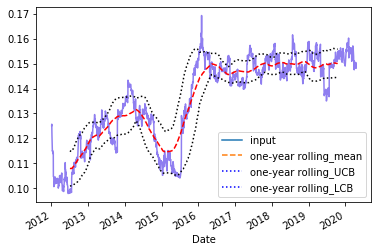

In [6]:
ratio = GOOG/NASDAQ

rolling = ratio.rolling(252, center=True)

data = pd.DataFrame({'input': ratio,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_UCB': rolling.mean() + rolling.std(),
                     'one-year rolling_LCB': rolling.mean() - rolling.std()})
p = data.plot(style=['-', '--', 'b:', 'b:'])
p.lines[0].set_color("mediumslateblue")
p.lines[0].set_alpha(0.85)
p.lines[1].set_color('red')
p.lines[2].set_color("black")
p.lines[3].set_color("black")